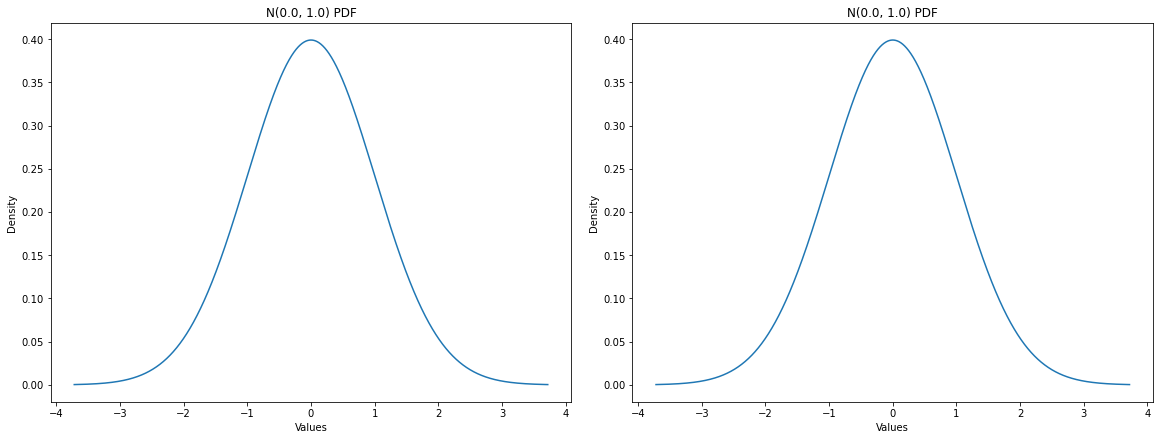

In [1]:
import function_john as fj
import numpy as np
from scipy.stats import norm
from datetime import datetime
import matplotlib.pyplot as plt

normal = norm(loc=0, scale=1)
x = np.linspace(normal.ppf(0.0001),
                normal.ppf(0.9999), 10000)
normal_densities = normal.pdf(x)

other_normal = norm(loc=0, scale=1)
other_normal_densities = other_normal.pdf(x)

dx = x[1] - x[0]

fig, ax = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)

ax[0].plot(x, normal_densities)
ax[0].set_title(f'N({normal.mean()}, {normal.std()}) PDF')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Density')

ax[1].plot(x, other_normal_densities)
ax[1].set_title(f'N({other_normal.mean()}, {other_normal.std()}) PDF')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Density')

plt.show()

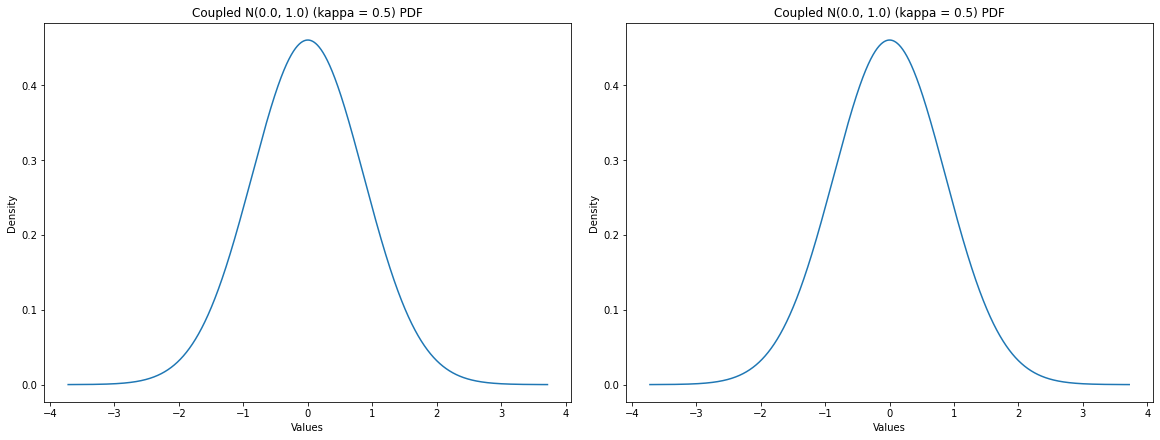

In [2]:
kappa, alpha, dim = 0.5, 1, 1

coupled_norm = fj.coupled_probability(dist=normal_densities, dx=dx, kappa=kappa, alpha=alpha, dim=dim)
coupled_other_norm = fj.coupled_probability(dist=other_normal_densities, dx=dx, kappa=kappa, alpha=alpha, dim=dim)

fig, ax = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)

ax[0].plot(x, coupled_norm)
ax[0].set_title(f'Coupled N({normal.mean()}, {normal.std()}) (kappa = {kappa}) PDF')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Density')

ax[1].plot(x, coupled_other_norm)
ax[1].set_title(f'Coupled N({other_normal.mean()}, {other_normal.std()}) (kappa = {kappa}) PDF')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Density')

plt.show()

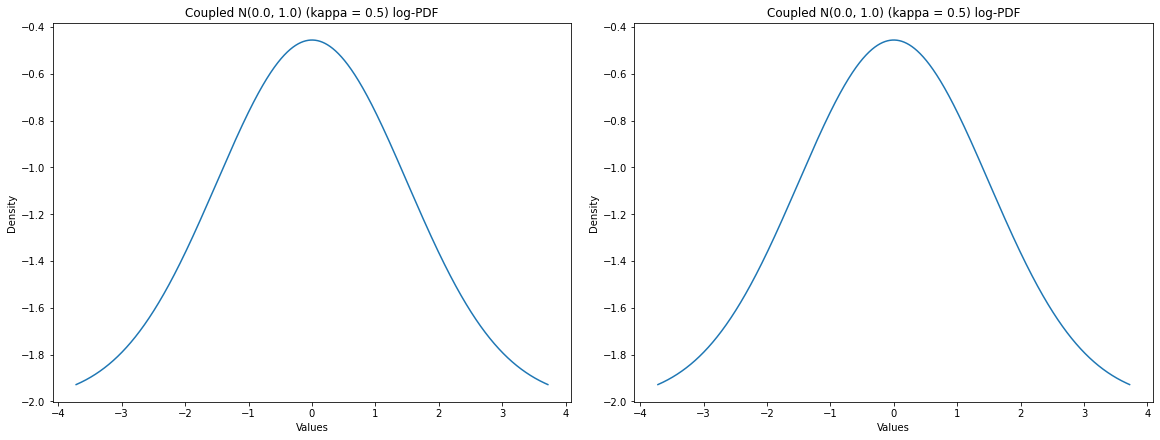

In [3]:
coupled_norm_log_densities = fj.coupled_logarithm(coupled_norm, kappa=kappa, dim=dim)
coupled_other_norm_log_densities = fj.coupled_logarithm(coupled_other_norm, kappa=kappa, dim=dim)

fig, ax = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)

ax[0].plot(x, coupled_norm_log_densities)
ax[0].set_title(f'Coupled N({normal.mean()}, {normal.std()}) (kappa = {kappa}) log-PDF')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Density')

ax[1].plot(x, coupled_other_norm_log_densities)
ax[1].set_title(f'Coupled N({other_normal.mean()}, {other_normal.std()}) (kappa = {kappa}) log-PDF')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Density')

plt.show()

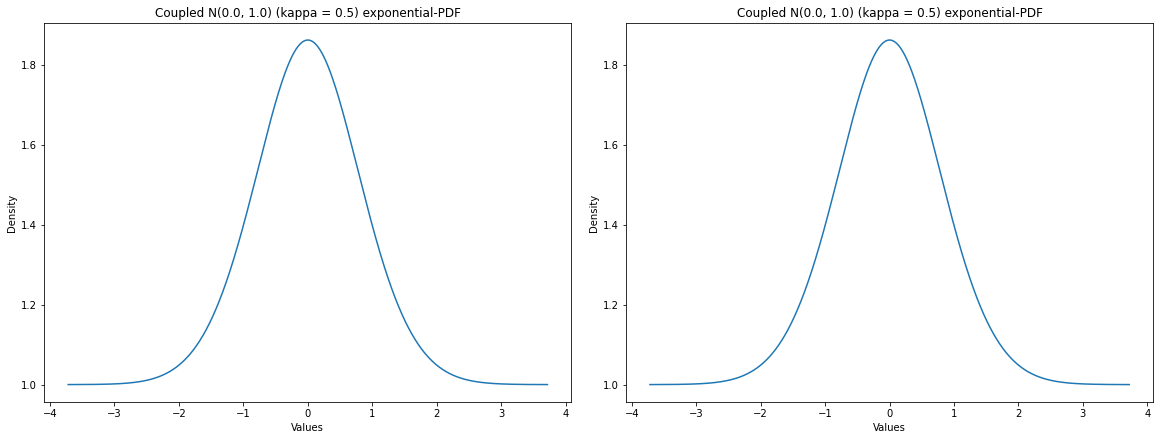

In [4]:
coupled_norm_exponential_densities = fj.coupled_exponential(coupled_norm, kappa=kappa, dim=dim)
coupled_other_norm_exponential_densities = fj.coupled_exponential(coupled_other_norm, kappa=kappa, dim=dim)

fig, ax = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)

ax[0].plot(x, coupled_norm_exponential_densities)
ax[0].set_title(f'Coupled N({normal.mean()}, {normal.std()}) (kappa = {kappa}) exponential-PDF')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Density')

ax[1].plot(x, coupled_other_norm_exponential_densities)
ax[1].set_title(f'Coupled N({other_normal.mean()}, {other_normal.std()}) (kappa = {kappa}) exponential-PDF')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Density')

plt.show()

In [5]:
fj.coupled_cross_entropy(coupled_other_norm, coupled_norm, dx=dx, kappa=kappa, alpha=alpha, dim=dim)

0.9901734562321995

In [6]:
fj.coupled_entropy(coupled_other_norm, dx=dx, kappa=kappa, alpha=alpha, dim=dim)

0.9901734562321995

In [7]:
fj.coupled_divergence(coupled_other_norm, coupled_norm, dx=dx, kappa=kappa, alpha=alpha, dim=dim)

0.0

In [13]:
from function import norm_CG as normCG

def CoupledNormalDistribution(mean, sigma, kappa, alpha):
    """
    Short description
    
    Inputs
    ----------
    x : Input variable in which the coupled logarithm is applied to.
    mean : 
    sigma : 
    kappa : Coupling parameter which modifies the coupled logarithm function.
    dim : The dimension of x, or rank if x is a tensor. Not needed?
    """

    assert sigma > 0, "std must be greater than 0."
    assert alpha in [1, 2], "alpha must be set to either 1 or 2."

    
    if kappa >= 0:
        input = np.arange(mean-20, mean+20, (20+mean - -20+mean)/(2**16+1))
    else:
        x1 = mean - ((-1*sigma**2) / kappa)**0.5
        x2 = mean + ((-1*sigma**2) / kappa)**0.5
        input = np.arange(mean - ((-1*sigma**2) / kappa)**0.5, mean + ((-1*sigma**2) / kappa)**0.5, (x2-x1)/(2**16+1))
 
    normCGvalue = 1/float(normCG(sigma, kappa))
    
    coupledNormalDistributionResult = normCGvalue * (fj.coupled_exponential((input - mean)**2/sigma**2, kappa)) ** -0.5
  
    return coupledNormalDistributionResult

In [16]:
mu, sigma = 0, 1 # mean and standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = CoupledNormalDistribution(mu, sigma, kappa, alpha)

test = fj.coupled_entropy(y, dx=dx, kappa=kappa, alpha=alpha, dim=dim)

1.5928313716551268

In [25]:
dx = np.arange(mu-20, mu+20, (20+mu - -20+mu)/(2**16+1))[1] - np.arange(mu-20, mu+20, (20+mu - -20+mu)/(2**16+1))[0]

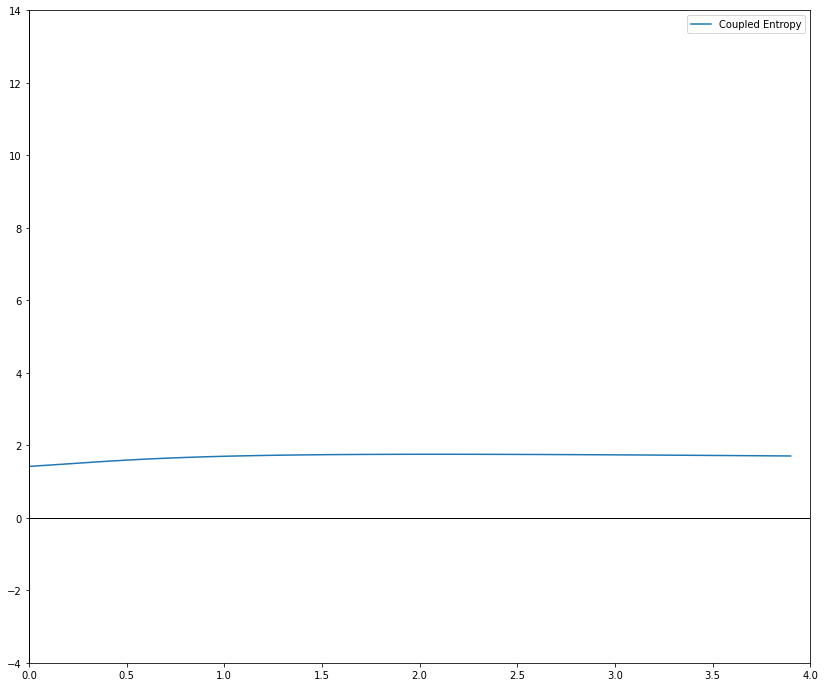

In [26]:
# plt.figure(figsize=(12, 8))
Y = {}
plot_coupledEntropy = []
plot_coupledEntropy_root = []
plot_tsallisEntropyNormalized_root = []
fig, ax = plt.subplots(figsize=(14, 12))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(0, 4, 0.1)]
n = len(kappa_values)
#ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.xlim(0, 4)
plt.ylim(-4, 14)

for kappa in kappa_values:
    y = CoupledNormalDistribution(0, 1, kappa, 2)
    Y[kappa] = fj.coupled_entropy(y, dx=dx, kappa=kappa, alpha=alpha, dim=dim)
    plot_coupledEntropy.append(Y[kappa])
    
plt.plot(kappa_values, plot_coupledEntropy, label='Coupled Entropy')
plt.legend()
plt.show();